# Introduction

 “If you talk to a man in a language he understands, that goes to his head. If you talk to him in his own language, that goes to his heart.” – Nelson Mandela The skills of translation are becoming ever more important and desirable. Today’s multicultural and multilingual society demands effective, efficient, and empathetic communication between languages and cultures. That’s important for various reasons. i) Not Everybody Speaks English(Global language). ii) It Enables A Global Economy. iii) The Spread of Information and Ideas.

Problem statement: The objective is to convert a Engish sentence to its Hindi counterpart using a Neural Machine Translation (NMT) system. The goal is to build a model with the help of neural networks, using python (precisely Tensorflow, keras), which translates the text into desired language. But, for this model to build, we need good size of the pre-translated data and then data should be prepared for the further process of building the model.

Background : "Machine Translation" is generally known as MT (abbreviation), and it deals with the investigation of the use of software to translate text or speech from one language to another. i) Machine Translation is not a new idea, it was proposed few decades before, more precisely around 1949 in Warren weaver's Memorandum on Translation. ii) It is also said that this idea of universal language with equivalent idea in different tongues sharing one symbol is proposed by Rene Descartes in 1629. iii) From 1949 on wards there is a long list of researchers contributed to this idea in different ways and it is materialized in 21st century through the advancement of modern scientific computation. Human translation can be explained as decoding the meaning of the text from the source language and re-encoding the meaning into the target language.As this process is concerned, one should know the basic rules of both the languages (source language and target language), precisely the {Grammar}. This suggests that it involves a lot of human intuitions. To carry out this using machine (computationally) is a big challenge. So, for making this possible, it cannot be done automatocally, a kind of human aid is needed. So, the different approaches have evolved with the time to attain the needed accuracy. There are some of the approaches are mentioned below 1) Rule-Based machine translation 2) Statistical machine translation 3) Example based machine translation 4) Hybrid machine translation 5) Neural machine translation

dataset explanation: The data taken is for English to French (fra.txt) , it constitutes of 1044268 sentences. The sentences are split into words and tokenized and then used for further process.

Overall approach and major steps: Implementation of Sequence-to-Sequence (Seq2Seq) Modeling in Python using Keras. Major steps to follow: 1) Import the Required Libraries 2) Read the Data into our IDE 3) Text Cleaning 4) Text to Sequence Conversion 5) Model Building

The dependent packages: 1) Tensorflow 2) keras 3) string 4) re 5) numpy 6) pandas 7) matplotlib


In [3]:
import tensorflow 
import keras

In [4]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

Our data is a text file (.txt) of English-French sentence pairs. First, we will read the file using the function defined below.

In [5]:
# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text

We’ll then split these pairs into English sentences and French sentences respectively.

In [6]:
# split a text into sentences
def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

We can now use these functions to read the text into an array in our desired format.

In [7]:
data = read_text("fra.txt")
fra_eng = to_lines(data)
fra_eng = array(fra_eng)

Let’s first take a look at our data. This will help us decide which pre-processing steps to adopt.

In [8]:
fra_eng

array([['Go.', 'Va !'],
       ['Hi.', 'Salut !'],
       ['Run!', 'Cours\u202f!'],
       ...,
       ['Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.',
        "Puisqu'il y a de multiples sites web sur chaque sujet, je clique d'habitude sur le bouton retour arrière lorsque j'atterris sur n'importe quelle page qui contient des publicités surgissantes. Je me rends juste sur la prochaine page proposée par Google et espère tomber sur quelque chose de moins irritant."],
       ["If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker.",
        "Si quelqu'un qui ne connaît pas vos antécédents dit 

In [8]:
len(fra_eng)

160872

The actual data contains over 160872 sentence-pairs. However, we will use full data. You can change this number as per your system’s computation power.

In [9]:
fra_eng = fra_eng[:160872,:]

We will get rid of the punctuation marks and then convert all the text to lower case.

In [10]:
# Remove punctuation
fra_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fra_eng[:,0]]
fra_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fra_eng[:,1]]

fra_eng

array([['Go', 'Va '],
       ['Hi', 'Salut '],
       ['Run', 'Cours\u202f'],
       ...,
       ['Since there are usually multiple websites on any given topic I usually just click the back button when I arrive on any webpage that has popup advertising I just go to the next page found by Google and hope for something less irritating',
        'Puisquil y a de multiples sites web sur chaque sujet je clique dhabitude sur le bouton retour arrière lorsque jatterris sur nimporte quelle page qui contient des publicités surgissantes Je me rends juste sur la prochaine page proposée par Google et espère tomber sur quelque chose de moins irritant'],
       ['If someone who doesnt know your background says that you sound like a native speaker it means they probably noticed something about your speaking that made them realize you werent a native speaker In other words you dont really sound like a native speaker',
        'Si quelquun qui ne connaît pas vos antécédents dit que vous parlez comme un 

In [12]:
# convert text to lowercase
for i in range(len(fra_eng)):
    fra_eng[i,0] = fra_eng[i,0].lower()
    fra_eng[i,1] = fra_eng[i,1].lower()

fra_eng

array([['go', 'va '],
       ['hi', 'salut '],
       ['run', 'cours\u202f'],
       ...,
       ['since there are usually multiple websites on any given topic i usually just click the back button when i arrive on any webpage that has popup advertising i just go to the next page found by google and hope for something less irritating',
        'puisquil y a de multiples sites web sur chaque sujet je clique dhabitude sur le bouton retour arrière lorsque jatterris sur nimporte quelle page qui contient des publicités surgissantes je me rends juste sur la prochaine page proposée par google et espère tomber sur quelque chose de moins irritant'],
       ['if someone who doesnt know your background says that you sound like a native speaker it means they probably noticed something about your speaking that made them realize you werent a native speaker in other words you dont really sound like a native speaker',
        'si quelquun qui ne connaît pas vos antécédents dit que vous parlez comme un 

A Seq2Seq model requires that we convert both the input and the output sentences into integer sequences of fixed length.

But before we do that, let’s visualise the length of the sentences. We will capture the lengths of all the sentences in two separate lists for English and French, respectively.


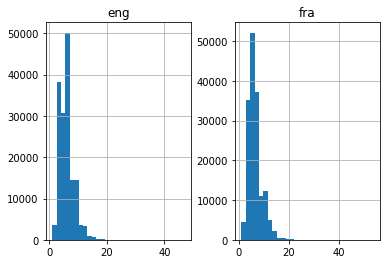

In [13]:
# empty lists
eng_l = []
fra_l = []

# populate the lists with sentence lengths
for i in fra_eng[:,0]:
      eng_l.append(len(i.split()))

for i in fra_eng[:,1]:
      fra_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'fra':fra_l})

length_df.hist(bins = 30)
plt.show()

In [14]:
fra_eng[115,0].split()

['go', 'away']

In [15]:
len(fra_eng[115,0].split())

2

Quite intuitive – the maximum length of the French sentences is 15 and that of the English phrases is 15.

Next, vectorize our text data by using Keras’s Tokenizer() class. 
It will turn our sentences into sequences of integers. 
We can then pad those sequences with zeros to make all the sequences of the same length.

Note that we will prepare tokenizers for both the French and English sentences:

In [16]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [39]:
# prepare english tokenizer
eng_tokenizer = tokenization(fra_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 15
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 14347


In [40]:
# prepare Deutch tokenizer
fra_tokenizer = tokenization(fra_eng[:, 1])
fra_vocab_size = len(fra_tokenizer.word_index) + 1

fra_length =15
print('french Vocabulary Size: %d' % fra_vocab_size)

french Vocabulary Size: 32113


The below code block contains a function to prepare the sequences. 
It will also perform sequence padding to a maximum sentence length as mentioned above.

In [41]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

We will now split the data into train and test set for model training and evaluation, respectively.

In [42]:
import sklearn

In [43]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(fra_eng, test_size=0.1, random_state = 12)

It’s time to encode the sentences. We will encode French sentences as the input sequences and English sentences as the target sequences. This has to be done for both the train and test datasets.

In [44]:
# prepare training data
trainX = encode_sequences(fra_tokenizer, fra_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(fra_tokenizer, fra_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

We’ll start off by defining our Seq2Seq model architecture:

For the encoder, we will use an embedding layer and an LSTM layer For the decoder, we will use another LSTM layer followed by a dense layer


In [45]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

We are using the RMSprop optimizer in this model as it’s usually a good choice when working with recurrent neural networks.

In [46]:
# model compilation
model = define_model(fra_vocab_size, eng_vocab_size, fra_length, eng_length, 512)

In [47]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Please note that we have used ‘sparse_categorical_crossentropy‘ as the loss function. This is because the function allows us to use the target sequence as is, instead of the one-hot encoded format. One-hot encoding the target sequences using such a huge vocabulary might consume our system’s entire memory.

We are all set to start training our model!

We will train it for 30 epochs and with a batch size of 512 with a validation split of 10%. 90% of the data will be used for training the model and the rest for evaluating it. You may change and play around with these hyperparameters.

We will also use the ModelCheckpoint() function to save the model with the lowest validation loss.


In [66]:
filename = 'model.h1.06_apr_19'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.1,callbacks=[checkpoint], 
                    verbose=1)

Train on 130305 samples, validate on 14479 samples
Epoch 1/30
130305/130305 [==============================] - 1594s 12ms/step - loss: 2.8369 - val_loss: 2.5074

Epoch 00001: val_loss improved from inf to 2.50737, saving model to model.h1.06_apr_19
Epoch 2/30
130305/130305 [==============================] - 1581s 12ms/step - loss: 2.3979 - val_loss: 2.2816

Epoch 00002: val_loss improved from 2.50737 to 2.28162, saving model to model.h1.06_apr_19
Epoch 3/30
130305/130305 [==============================] - 1572s 12ms/step - loss: 2.1429 - val_loss: 2.0406

Epoch 00003: val_loss improved from 2.28162 to 2.04061, saving model to model.h1.06_apr_19
Epoch 4/30
130305/130305 [==============================] - 1572s 12ms/step - loss: 1.9156 - val_loss: 1.8708

Epoch 00004: val_loss improved from 2.04061 to 1.87082, saving model to model.h1.06_apr_19
Epoch 5/30
130305/130305 [==============================] - 1571s 12ms/step - loss: 1.7210 - val_loss: 1.6923

Epoch 00005: val_loss improved fro

Let’s compare the training loss and the validation loss.

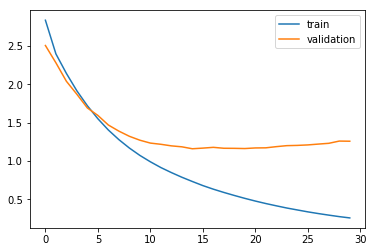

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

As you can see in the above plot, the validation loss stopped decreasing after 10 epochs.

Finally, we can load the saved model and make predictions on the unseen data – testY.


In [48]:
model = load_model('model.h1.06_apr_19')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

These predictions are sequences of integers. We need to convert these integers to their corresponding words. Let’s define a function to do this:

In [49]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

Convert predictions into text (English)

In [50]:
preds_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], eng_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       preds_text.append(' '.join(temp))

In [51]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

We can randomly print some actual vs predicted instances to see how our model performs:

In [52]:
# print 15 rows randomly
pred_df.sample(15)

,actual,predicted
8379,they painted the fence green,they painted the fence green
11766,why did you paint this wall black,why did you paint the wall
10957,mary is not wearing a bra,mary is wears like
8398,she was breathing hard,she is with
1826,im not done with you yet,im not done with you yet
12372,tom lost,tom lost
8855,i regret doing that,i regret that
9292,what does your son do,what made your you
11998,everyones out,everyones is
304,you could get arrested for that,the police could stop this that


Our Seq2Seq model does a decent job. But there are several instances where it misses out on understanding the key words.